# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Set base url and units variables, and combine them to get the query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create empty lists to store the data for each field
city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []

# Loop through cities
for city in cities:
    
    # Get the JSON response from the OpenWeather API
    response_json = requests.get(query_url + city).json()
    
    # Start the error handling
    # Retrieve the items for each field and append them to the empty lists  
    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)
            
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp = response_json['main']['temp']
        temp_list.append(temp)

        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)

        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)

        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
    
        print(f"City Name: {city}, City ID: {city_id}")
    
    # Print error message and move on to the next city if there is an error
    except:
        
        print("That record does not exist, searching for next record...")
        print('finished')

City Name: kodiak, City ID: 5866583
City Name: ribeira grande, City ID: 3372707
City Name: east london, City ID: 1006984
City Name: sorland, City ID: 3137469
City Name: bambous virieux, City ID: 1106677
City Name: cidreira, City ID: 3466165
City Name: tasiilaq, City ID: 3424607
City Name: busselton, City ID: 2075265
City Name: butaritari, City ID: 2110227
City Name: rikitea, City ID: 4030556
City Name: tuktoyaktuk, City ID: 6170031
City Name: atuona, City ID: 4020109
City Name: bengkulu, City ID: 1649150
City Name: port macquarie, City ID: 2152659
City Name: ankang, City ID: 1789065
City Name: klamath falls, City ID: 5735238
That record does not exist, searching for next record...
finished
City Name: qaanaaq, City ID: 3831208
City Name: sherbakul, City ID: 1492255
City Name: punta arenas, City ID: 3874787
City Name: khatanga, City ID: 2022572
City Name: barrow, City ID: 5880054
City Name: katsuura, City ID: 2112309
City Name: east wenatchee, City ID: 5793271
City Name: lompoc, City ID:

City Name: launceston, City ID: 2160517
City Name: jackson, City ID: 5733351
City Name: costa rica, City ID: 3465303
City Name: trincomalee, City ID: 1226260
City Name: pangnirtung, City ID: 6096551
That record does not exist, searching for next record...
finished
City Name: nanortalik, City ID: 3421765
City Name: sao felix do xingu, City ID: 3388847
That record does not exist, searching for next record...
finished
City Name: turukhansk, City ID: 1488903
City Name: paveh, City ID: 121240
City Name: alamosa, City ID: 5411479
City Name: cape town, City ID: 3369157
City Name: astoria, City ID: 5711847
City Name: loon op zand, City ID: 2751455
City Name: barnstaple, City ID: 2656281
City Name: altay, City ID: 1529651
City Name: velingrad, City ID: 725988
City Name: mar del plata, City ID: 3430863
City Name: polewali, City ID: 1630935
That record does not exist, searching for next record...
finished
City Name: nelson bay, City ID: 2155562
City Name: ust-uda, City ID: 2013865
City Name: shie

City Name: nurobod, City ID: 1513064
City Name: andenes, City ID: 3163146
City Name: traverse city, City ID: 5012495
City Name: arkul, City ID: 580931
City Name: ranong, City ID: 1150965
City Name: tautira, City ID: 4033557
City Name: ukiah, City ID: 5404476
City Name: codrington, City ID: 2171099
That record does not exist, searching for next record...
finished
City Name: skjervoy, City ID: 777682
City Name: ghatsila, City ID: 1271319
City Name: arzgir, City ID: 580716
City Name: dayong, City ID: 1789289
City Name: biltine, City ID: 244878
City Name: los llanos de aridane, City ID: 2514651
City Name: chichli, City ID: 1274267
City Name: alofi, City ID: 4036284
City Name: thap than, City ID: 1150210
City Name: maceio, City ID: 3395981
City Name: jalu, City ID: 86049
City Name: general pico, City ID: 3855075
City Name: yar-sale, City ID: 1486321
City Name: kapit, City ID: 1737185
City Name: yugorsk, City ID: 1502725
City Name: gizo, City ID: 2108857
City Name: qasigiannguit, City ID: 34

City Name: banyuwangi, City ID: 1650077
City Name: meulaboh, City ID: 1214488
City Name: daru, City ID: 2098329
City Name: banda aceh, City ID: 1215502
City Name: fukuma, City ID: 1863978
City Name: buala, City ID: 2109528


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Convert the data into a dataframe
cities_df = pd.DataFrame({"City ID": city_id_list, "City": city_name_list, "Country": country_list, "Lat": lat_list, "Lng": lng_list,
                         "Temperature": temp_list, "Humidity": humidity_list, "Clouds": clouds_list,
                         "Wind Speed": wind_speed_list})
cities_df.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,5866583,Saint Paul Harbor,US,57.79,-152.41,35.60,74,20,10.29
1,3372707,Ribeira Grande,PT,38.52,-28.70,61.63,71,99,10.29
2,1006984,East London,ZA,-33.02,27.91,67.95,75,81,10.54
3,3137469,Sørland,NO,67.67,12.69,37.81,77,94,8.70
4,1106677,Bambous Virieux,MU,-20.34,57.76,77.00,88,40,11.41


In [9]:
# Export to .csv file
cities_df.to_csv('cityweather.csv', index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

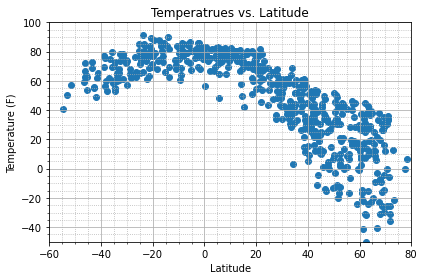

<Figure size 432x288 with 0 Axes>

In [13]:
x_values = cities_df['Lat']
y_values = cities_df['Temperature']

plt.scatter(x_values, y_values)
plt.title('Temperatrues vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(-50, 100)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("lat_vs_temp.png")

## Latitude vs. Humidity Plot

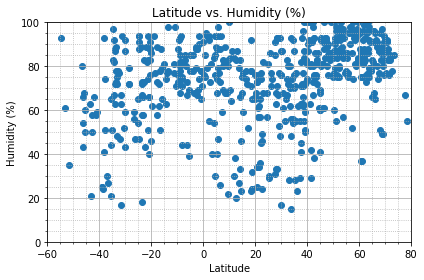

<Figure size 432x288 with 0 Axes>

In [46]:
x_values = cities_df['Lat']
y_values = cities_df['Humidity']

plt.scatter(x_values, y_values)
plt.title('Latitude vs. Humidity (%)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0,100)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("lat_vs_hum.png")

## Latitude vs. Cloudiness Plot

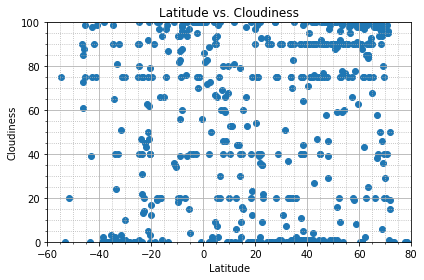

<Figure size 432x288 with 0 Axes>

In [20]:
x_values = cities_df['Lat']
y_values = cities_df['Clouds']

plt.scatter(x_values, y_values)
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.ylim(0,100)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("lat_vs_clds.png")

## Latitude vs. Wind Speed Plot

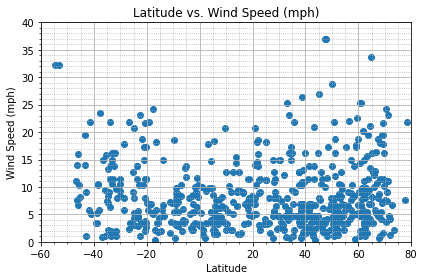

<Figure size 432x288 with 0 Axes>

In [21]:
x_values = cities_df['Lat']
y_values = cities_df['Wind Speed']

plt.scatter(x_values, y_values)
plt.title('Latitude vs. Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0,40)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("lat_vs_wind.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [49]:
northern = cities_df['Lat'] >= 0
northern_hemisphere = cities_df[northern]
northern_hemisphere.to_csv('northern_hemisphere.csv', index=False, header=True)
northern_hemisphere

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,5866583,Saint Paul Harbor,US,57.79,-152.41,35.60,74,20,10.29
1,3372707,Ribeira Grande,PT,38.52,-28.70,61.63,71,99,10.29
3,3137469,Sørland,NO,67.67,12.69,37.81,77,94,8.70
6,3424607,Tasiilaq,GL,65.61,-37.64,24.80,68,98,3.36
8,2110227,Butaritari,KI,3.07,172.79,81.81,81,50,17.83
...,...,...,...,...,...,...,...,...,...
563,2446796,Bilma,NE,18.69,12.92,59.81,32,23,4.88
565,364933,Umm Kaddadah,SD,13.60,26.69,66.51,27,0,15.41
567,1214488,Meulaboh,ID,4.14,96.13,76.05,84,100,5.35
569,1215502,Banda Aceh,ID,5.56,95.32,78.48,79,100,5.19


In [48]:
southern = cities_df['Lat'] < 0
southern_hemisphere = cities_df[southern]
southern_hemisphere.to_csv('southern_hemisphere.csv', index=False, header=True)
southern_hemisphere

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
2,1006984,East London,ZA,-33.02,27.91,67.95,75,81,10.54
4,1106677,Bambous Virieux,MU,-20.34,57.76,77.00,88,40,11.41
5,3466165,Cidreira,BR,-30.18,-50.21,72.03,92,1,10.51
7,2075265,Busselton,AU,-33.65,115.33,60.26,73,0,1.01
9,4030556,Rikitea,PF,-23.12,-134.97,77.68,66,13,2.93
...,...,...,...,...,...,...,...,...,...
562,3837213,San Juan,AR,-31.54,-68.54,78.24,17,3,9.62
564,3661756,Uarini,BR,-2.99,-65.11,77.00,88,40,2.24
566,1650077,Banyuwangi,ID,-8.23,114.36,76.96,82,99,2.84
568,2098329,Daru,PG,-9.08,143.21,83.19,82,87,9.82


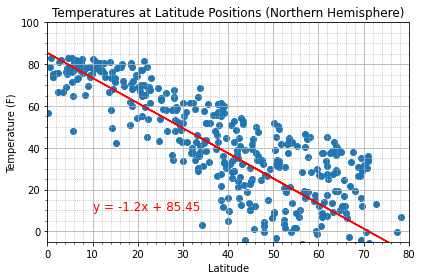

<Figure size 432x288 with 0 Axes>

In [41]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(-5, 100)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("northern_lat_temp_regression")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

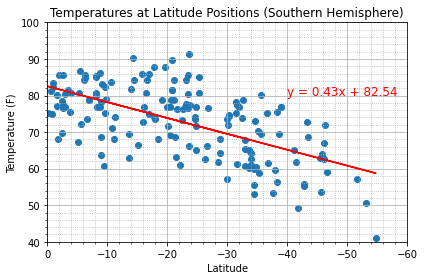

<Figure size 432x288 with 0 Axes>

In [40]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(40, 100)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("southern_lat_temp_regression")

###  Temperatures at Latitude Positions Analysis
##### From the above plots of the random cities in the southern and northern hemisphere, there is a clear corrleation between temperature and closeness to 0 degrees (equator) latitude. The closer the city is to the equator, the higher the max temperatures.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

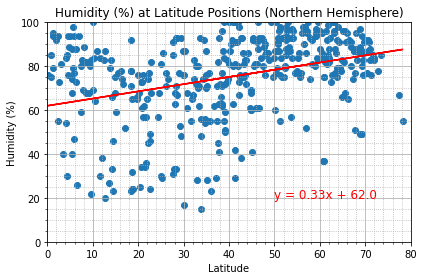

<Figure size 432x288 with 0 Axes>

In [45]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity (%) at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 100)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("northern_lat_hum_regression")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

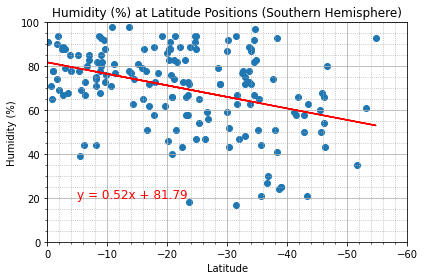

<Figure size 432x288 with 0 Axes>

In [61]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity (%) at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-5,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 100)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("southern_lat_hum_regression")

#### Humidity at Latitude Positions Analysis
##### In the sorthern hemisphere it appears as if the ability to achieve high humidity does not depend on latitude. Most of the cities showed a max humidity of 75% or higher. In the southern hemisphere, there doesn't appear to be any type of correlation although close to the equator there appears to be a large grouping of cities that are 70% or greater. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

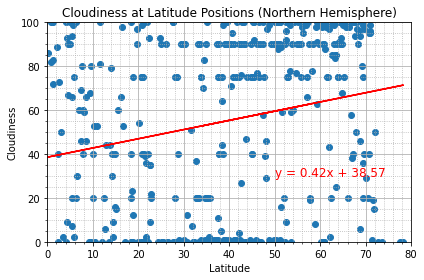

<Figure size 432x288 with 0 Axes>

In [63]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Clouds']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,30),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.ylim(0, 100)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("northern_lat_clds_regression")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

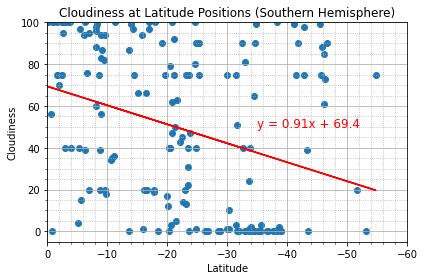

<Figure size 432x288 with 0 Axes>

In [65]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Clouds']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,50),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.ylim(-5, 100)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("southern_lat_clds_regression")

#### Cloudiness at Latitude Analysis
##### In both hemispheres, there are plots scattter all across the graph. However, there is a high concentration around 100 and another high concentration aroud 0 cloudiness. That tells me that no matter the latitude, there are some areas that are prone to cloudiness and others that are not. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

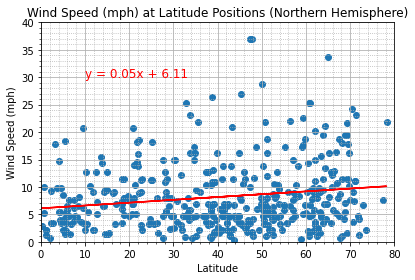

<Figure size 432x288 with 0 Axes>

In [69]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed (mph) at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("northern_lat_wind_regression")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

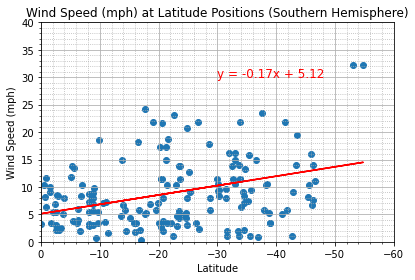

<Figure size 432x288 with 0 Axes>

In [73]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed (mph) at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("southern_lat_wind_regression")

#### Wind Speed at Latitude Analysis
##### Both plots show that the instances of higher wind speed seems to be greather as you get further away from latitude 0 (equator). 